In [1]:
import mdtraj as md
import MDAnalysis as mda
from MDAnalysis.analysis.base import (AnalysisBase,
                                      AnalysisFromFunction,
                                      analysis_class)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pathlib import Path

In [3]:
u = mda.Universe('deca56D_clean.pdb', 'deca56D_prd.dcd')

/home/crystal/miniconda3/envs/openmm/lib/python3.10/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [4]:
len(u.trajectory)

2000000

In [5]:
mda_rg = np.load('mda_rg.npy')

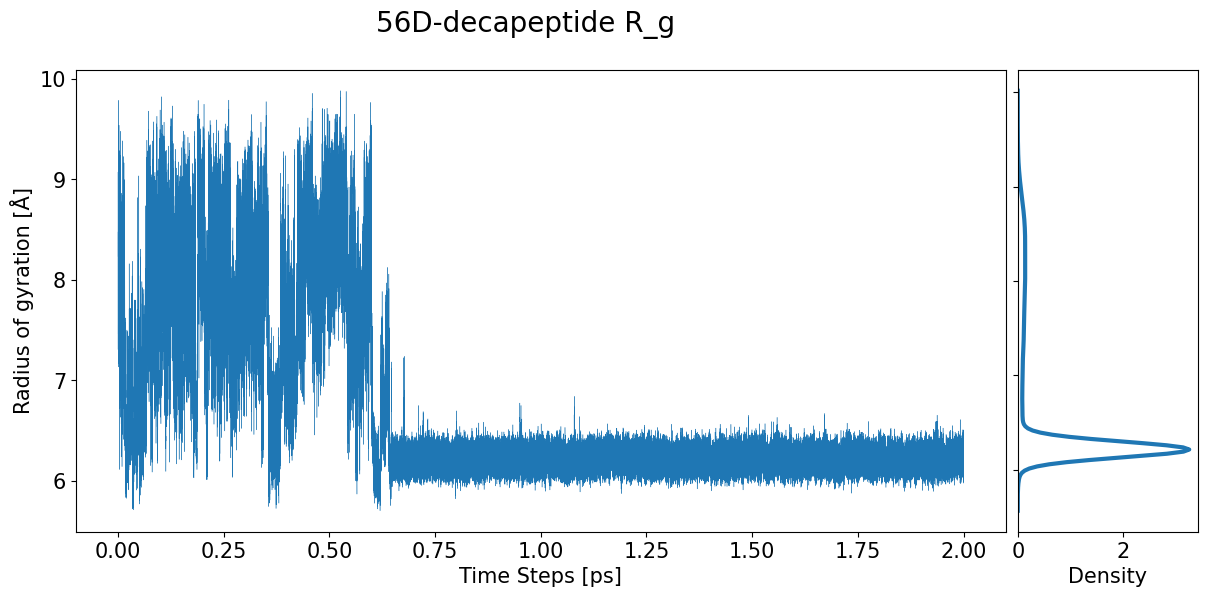

In [7]:
from pylab import *
from math import pi
time_steps = np.arange(0, 2000000)

fig, ax = plt.subplots(figsize=(12, 6))
inty_ax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0,
                            0.15, ax.get_position().height])

ax.plot(time_steps/1000000, mda_rg, marker='o', markersize=0, linestyle='-', lw=0.3)
ax.set_xlabel('Time Steps [ps]', fontsize = 15)
ax.set_ylabel('Radius of gyration [Å]', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.kdeplot(y = mda_rg, ax = inty_ax, lw=3)
inty_ax.set_xlabel('Density', fontsize=15)
inty_ax.tick_params(labelleft = False, labelsize = 15)

fig.suptitle('56D-decapeptide R_g', fontsize = 20)
plot_filename = f'56D-decapeptide RG.png'
plt.savefig(plot_filename, bbox_inches='tight',dpi=600)
plt.show()